# MERGE DATASETS

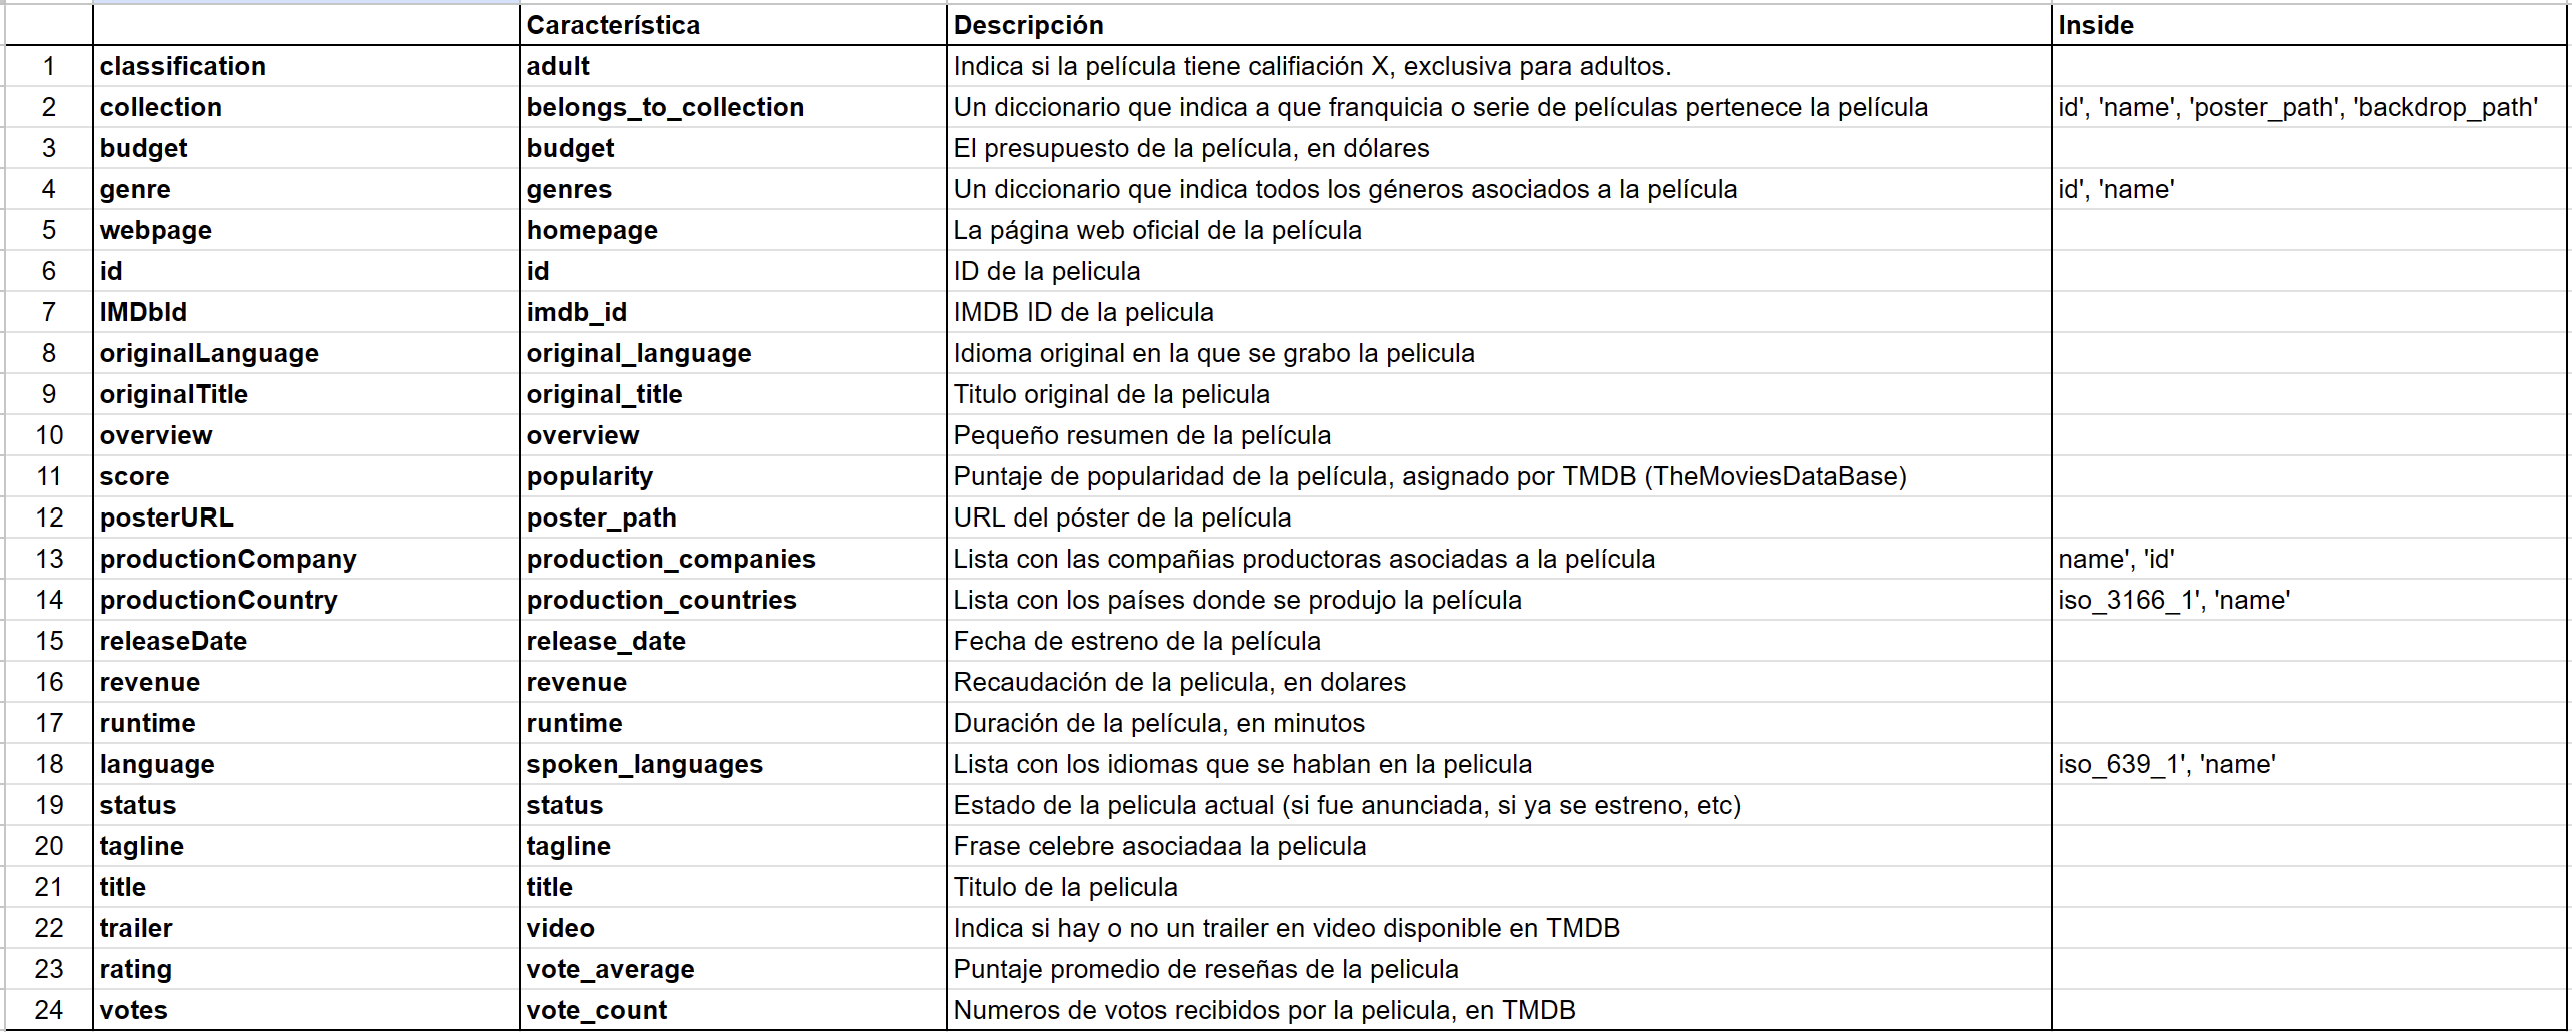

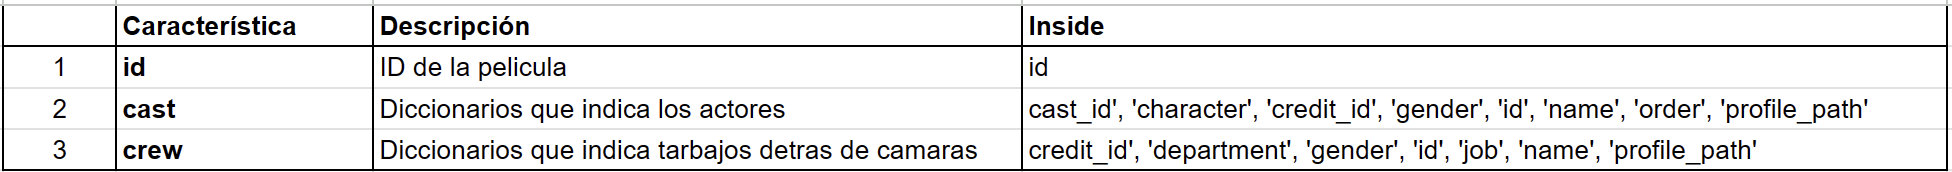

In [1]:
# importar librerias
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

import ast

In [2]:
# cargar datos
df1 = pd.read_csv('movies_datasetB.csv', sep=',', encoding='utf-8', decimal='.')
df2 = pd.read_csv('credits_datasetB.csv', sep=',', encoding='utf-8', decimal='.')

# merge

In [3]:
# unir dataset
df = pd.merge(df1, df2, how='inner', on='id')

In [4]:
#  eda
pd.set_option('display.max_columns', None) # mostrar todas las columnas
df.head(3)

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast.name,crew.director.name
0,862,Toy Story,Toy Story Collection,"Animation, Comedy, Family",No Data,"Led by Woody, Andy's toys live happily in his ...",en,81.0,Released,1995-10-30,1995,en,Pixar Animation Studios,United States of America,30000000.0,373554033.0,12.45,7.7,21.946943,5415,"['Animation', 'Comedy', 'Family']",['en'],"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,Jumanji,Not in a Collection,"Adventure, Fantasy, Family",Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"en, fr",104.0,Released,1995-12-15,1995,en,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,65000000.0,262797249.0,4.04,6.9,17.015539,2413,"['Adventure', 'Fantasy', 'Family']","['en', 'fr']","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,Grumpier Old Men,Grumpy Old Men Collection,"Romance, Comedy",Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,en,101.0,Released,1995-12-22,1995,en,"Warner Bros., Lancaster Gate",United States of America,0.0,0.0,0.00,6.5,11.712900,92,"['Romance', 'Comedy']",['en'],"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch


In [5]:
# renombrar columnas
df.rename({'cast.name': 'cast', 'crew.director.name': 'director'}, axis=1, inplace=True)

In [317]:
# validar cambios
df.sample(3)

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
31244,44647,Rock Slyde,Not in a Collection,"Comedy, Thriller, Mystery",A down and out private detective engages in a ...,Between trying to get Judy Bee (Elaine Hendrix...,en,86.0,Released,2010-05-01,2010,en,No Data,United States of America,0.0,0.0,0.0,5.5,1.169769,7,"['Comedy', 'Thriller', 'Mystery']",['en'],"Patrick Warburton, Andy Dick, Rena Sofer, Elai...",Chris Dowling
1705,10668,Suicide Kings,Not in a Collection,"Action, Comedy, Crime, Drama, Thriller",No Data,Christopher Walken shines in this cult-favorit...,en,106.0,Released,1997-09-06,1997,en,"Live Entertainment, Mediaworks, Dinamo Enterta...",United States of America,0.0,0.0,0.0,6.7,9.262719,86,"['Action', 'Comedy', 'Crime', 'Drama', 'Thrill...",['en'],"Christopher Walken, Henry Thomas, Sean Patrick...",Peter O'Fallon
28184,99332,Eurocrime! The Italian Cop and Gangster Films ...,Not in a Collection,Documentary,No Data,A documentary concerning the violent Italian '...,"it, en",127.0,Released,2012-03-30,2012,en,No Data,"United States of America, Italy",0.0,0.0,0.0,8.0,0.438956,4,['Documentary'],"['it', 'en']","Enzo G. Castellari, Leonard Mann, Franco Nero,...",Mike Malloy


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45418 entries, 0 to 45417
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45418 non-null  int64  
 1   title              45418 non-null  object 
 2   collection         45418 non-null  object 
 3   genre              45418 non-null  object 
 4   tagline            45418 non-null  object 
 5   overview           45418 non-null  object 
 6   language           45418 non-null  object 
 7   runtime            45418 non-null  float64
 8   status             45418 non-null  object 
 9   releaseDate        45418 non-null  object 
 10  releaseYear        45418 non-null  int64  
 11  originalLanguage   45418 non-null  object 
 12  productionCompany  45418 non-null  object 
 13  productionCountry  45418 non-null  object 
 14  budget             45418 non-null  float64
 15  revenue            45418 non-null  float64
 16  return             454

Se reemplaza los valores sin dato de la columna language con los daots de la columna originalLanguage. Si tanto la columna language como la columna originalLanguage no disponen de datos se decide eliminar dichos registros considerando que mas adelante al implementar el modelo de machine learning se hara un filtro con la columna language 

In [319]:
# verificar registros a eliminar
df[(df['language']=='xx') & (df['originalLanguage']=='xx')].index

Int64Index([ 2926,  3198,  4334, 15688, 19168, 23533, 24232, 25223, 25918,
            25919, 27665, 27753, 28375, 28613, 32325, 34937, 34938, 34942,
            34944, 34949, 35079, 37432, 41848, 43477, 43478, 44618, 44663,
            44689],
           dtype='int64')

In [320]:
# verificar registros a eliminar
df[(df['language']=='No Data') & (df['originalLanguage']=='xx')].index

Int64Index([15424, 34940, 34943, 35150, 39942], dtype='int64')

In [6]:
# eliminar registros
df.drop([2926,  3198,  4334, 15688, 19168, 23533, 24232, 25223, 25918,
         25919, 27665, 27753, 28375, 28613, 32325, 34937, 34938, 34942,
         34944, 34949, 35079, 37432, 41848, 43477, 43478, 44618, 44663,
         44689, 15424, 34940, 34943, 35150, 39942], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True) # reset index

In [322]:
# validar cambios
df.shape

(45385, 24)

In [323]:
# verificar registros a remplazar
df[df['language']=='xx']

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
1905,19,Metropolis,Not in a Collection,"Drama, Science Fiction",There can be no understanding between the hand...,In a futuristic city sharply divided between t...,xx,153.0,Released,1927-01-10,1927,de,"Paramount Pictures, Universum Film (UFA)",Germany,92620000.0,650422.0,0.01,8.0,14.487867,666,"['Drama', 'Science Fiction']",['xx'],"Brigitte Helm, Alfred Abel, Gustav Fröhlich, R...",Fritz Lang
2119,52782,Downhill,Not in a Collection,Drama,No Data,After public school student Roddy Berwick take...,xx,110.0,Released,1927-10-24,1927,en,Gainsborough Pictures,United Kingdom,0.0,0.0,0.00,6.3,1.646779,11,['Drama'],['xx'],"Ivor Novello, Annette Benson, Isabel Jeans, Ia...",Alfred Hitchcock
3029,32628,Three Ages,Not in a Collection,"Drama, Comedy",No Data,"""The Three Ages,"" Buster Keaton's first featur...",xx,63.0,Released,1923-09-24,1923,en,Buster Keaton Productions,United States of America,0.0,0.0,0.00,7.2,1.539713,20,"['Drama', 'Comedy']",['xx'],"Buster Keaton, Margaret Leahy, Wallace Beery, ...","Edward F. Cline, Buster Keaton"
3197,10098,The Kid,Not in a Collection,"Comedy, Drama",6 reels of Joy.,Considered one of Charlie Chaplin's best films...,xx,68.0,Released,1921-01-21,1921,en,"Charles Chaplin Productions, First National Pi...",United States of America,250000.0,2500000.0,10.00,8.0,8.168456,404,"['Comedy', 'Drama']",['xx'],"Charlie Chaplin, Jackie Coogan, Edna Purviance...",Charlie Chaplin
4283,5991,The Last Laugh,Not in a Collection,Drama,No Data,"An aging doorman, after being fired from his p...",xx,90.0,Released,1924-12-23,1924,de,Universum Film (UFA),Germany,0.0,0.0,0.00,7.7,3.553763,63,['Drama'],['xx'],"Emil Jannings, Maly Delschaft, Max Hiller, Han...",F.W. Murnau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45309,184402,Opus IV,Not in a Collection,Animation,No Data,An abstract animation by Walter Ruttmann.,xx,4.0,Released,1925-04-09,1925,de,No Data,Germany,0.0,0.0,0.00,6.9,0.433345,4,['Animation'],['xx'],No Data,Walter Ruttmann
45339,127762,Baignade en Mer,Not in a Collection,Documentary,No Data,"Several little boys run along a pier, then jum...",xx,1.0,Released,1895-12-28,1895,fr,Lumière,France,0.0,0.0,0.00,5.3,0.429666,12,['Documentary'],['xx'],No Data,Louis Lumière
45364,44333,The Living Playing Cards,Not in a Collection,Fantasy,No Data,A bearded magician holds up a large playing ca...,xx,3.0,Released,1905-01-01,1905,fr,Star-Film,France,0.0,0.0,0.00,6.1,0.208349,8,['Fantasy'],['xx'],Georges Méliès,Georges Méliès
45370,49280,The One-Man Band,Not in a Collection,"Fantasy, Action, Thriller",No Data,A band-leader has arranged seven chairs for th...,xx,1.0,Released,1900-01-01,1900,fr,Star Film Company,France,0.0,0.0,0.00,6.5,1.109068,22,"['Fantasy', 'Action', 'Thriller']",['xx'],Georges Méliès,Georges Méliès


In [324]:
# verificar registros a remplazar
df[df['language']=='xx'].index

Int64Index([ 1905,  2119,  3029,  3197,  4283,  6304,  6854,  6855,  6932,
             7109,
            ...
            45139, 45159, 45182, 45207, 45256, 45309, 45339, 45364, 45370,
            45371],
           dtype='int64', length=276)

In [7]:
# reemplazar 'xx' con valores nulos
df['language']= df['language'].apply(lambda x: np.nan if x=='xx' else x)

In [326]:
# verificar registros a remplazar
df[df['language']=='No Data']

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
50,117164,Guardian Angel,Not in a Collection,"Action, Thriller, Drama",She's no angel of mercy.,Detective - turned - bodyguard Cynthia McKay (...,No Data,93.0,Released,1994-11-22,1994,en,No Data,No Data,0.0,0.0,0.0,6.3,0.595949,3,"['Action', 'Thriller', 'Drama']",[],"Cynthia Rothrock, Marshall R. Teague, Daniel M...",Richard W. Munchkin
83,188588,Last Summer in the Hamptons,Not in a Collection,No Data,No Data,"Filmed entirely on location in East Hampton, L...",No Data,108.0,Released,1995-11-22,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.531159,0,[],[],"Victoria Foyt, Viveca Lindfors, Jon Robin Bait...",Henry Jaglom
107,96357,Headless Body in Topless Bar,Not in a Collection,Crime,No Data,An ex-con holds a group of people hostage in a...,No Data,110.0,Released,1995-05-20,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001346,0,['Crime'],[],"Raymond J. Barry, Rustam Branaman, Jennifer Ma...",James Bruce
126,290157,Jupiter's Wife,Not in a Collection,No Data,A Haunting Real Life Mystery,"Michel Negroponte, a documentary filmmaker, me...",No Data,87.0,Released,1995-01-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001178,0,[],[],Maggie Cogan,Michel Negroponte
137,124639,Target,Not in a Collection,No Data,No Data,A subtle yet violent commentary on feudal lords.,No Data,122.0,Released,1995-08-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001205,0,[],[],No Data,Sandip Ray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45363,49279,The Man with the Rubber Head,Not in a Collection,"Comedy, Fantasy, Science Fiction",No Data,A chemist in his laboratory places upon a tabl...,No Data,3.0,Released,1901-01-01,1901,fr,Star Film Company,France,0.0,0.0,0.0,7.6,1.618458,29,"['Comedy', 'Fantasy', 'Science Fiction']",[],Georges Méliès,Georges Méliès
45366,49271,The Devilish Tenant,Not in a Collection,"Fantasy, Comedy",No Data,A man rents an apartment and furnishes it in r...,No Data,6.0,Released,1909-01-01,1909,en,Star Film Company,France,0.0,0.0,0.0,6.7,0.725084,12,"['Fantasy', 'Comedy']",[],"André Méliès, Georges Méliès",Georges Méliès
45367,44324,The Untameable Whiskers,Not in a Collection,No Data,No Data,The background of this picture represents a sc...,No Data,3.0,Released,1904-03-05,1904,fr,Star Film Company,France,0.0,0.0,0.0,6.0,0.213973,6,[],[],Georges Méliès,Georges Méliès
45368,122036,The Imperceptable Transmutations,Not in a Collection,No Data,No Data,This shows a prince entering upon the stage of...,No Data,2.0,Released,1904-01-01,1904,fr,Star Film Company,France,0.0,0.0,0.0,5.0,0.071782,2,[],[],No Data,Georges Méliès


In [327]:
# verificar registros a remplazar
df[df['language']=='No Data'].index

Int64Index([   50,    83,   107,   126,   137,   189,   390,   393,   398,
              399,
            ...
            45307, 45308, 45329, 45350, 45362, 45363, 45366, 45367, 45368,
            45383],
           dtype='int64', length=3765)

In [8]:
# reemplazar 'No Data' con valores nulos
df['language']= df['language'].apply(lambda x: np.nan if x=='No Data' else x)

In [9]:
# funcion
def buffer(x):
    return x

In [10]:
# imputar valores nulos
df['language'].fillna(value=df['originalLanguage'].apply(buffer), inplace=True)

In [331]:
# validar cambios
df.loc[[1905,  2119,  3029,  3197,  4283,  6304,  6854,  6855,  6932, 50, 83, 107, 126, 137, 189, 390, 393, 398]]

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
1905,19,Metropolis,Not in a Collection,"Drama, Science Fiction",There can be no understanding between the hand...,In a futuristic city sharply divided between t...,de,153.0,Released,1927-01-10,1927,de,"Paramount Pictures, Universum Film (UFA)",Germany,92620000.0,650422.0,0.01,8.0,14.487867,666,"['Drama', 'Science Fiction']",['xx'],"Brigitte Helm, Alfred Abel, Gustav Fröhlich, R...",Fritz Lang
2119,52782,Downhill,Not in a Collection,Drama,No Data,After public school student Roddy Berwick take...,en,110.0,Released,1927-10-24,1927,en,Gainsborough Pictures,United Kingdom,0.0,0.0,0.00,6.3,1.646779,11,['Drama'],['xx'],"Ivor Novello, Annette Benson, Isabel Jeans, Ia...",Alfred Hitchcock
3029,32628,Three Ages,Not in a Collection,"Drama, Comedy",No Data,"""The Three Ages,"" Buster Keaton's first featur...",en,63.0,Released,1923-09-24,1923,en,Buster Keaton Productions,United States of America,0.0,0.0,0.00,7.2,1.539713,20,"['Drama', 'Comedy']",['xx'],"Buster Keaton, Margaret Leahy, Wallace Beery, ...","Edward F. Cline, Buster Keaton"
3197,10098,The Kid,Not in a Collection,"Comedy, Drama",6 reels of Joy.,Considered one of Charlie Chaplin's best films...,en,68.0,Released,1921-01-21,1921,en,"Charles Chaplin Productions, First National Pi...",United States of America,250000.0,2500000.0,10.00,8.0,8.168456,404,"['Comedy', 'Drama']",['xx'],"Charlie Chaplin, Jackie Coogan, Edna Purviance...",Charlie Chaplin
4283,5991,The Last Laugh,Not in a Collection,Drama,No Data,"An aging doorman, after being fired from his p...",de,90.0,Released,1924-12-23,1924,de,Universum Film (UFA),Germany,0.0,0.0,0.00,7.7,3.553763,63,['Drama'],['xx'],"Emil Jannings, Maly Delschaft, Max Hiller, Han...",F.W. Murnau
6304,26317,Man with a Movie Camera,Not in a Collection,"Drama, Documentary",No Data,A man travels around a city with a camera slun...,ru,68.0,Released,1929-01-08,1929,ru,VUFKU,Soviet Union,0.0,0.0,0.00,8.1,4.694378,114,"['Drama', 'Documentary']",['xx'],Mikhail Kaufman,Dziga Vertov
6854,234,The Cabinet of Dr. Caligari,Not in a Collection,"Drama, Horror, Thriller, Crime",You must become Caligari.,The Cabinet of Dr. Caligari is eerie and expre...,de,78.0,Released,1920-02-25,1920,de,Decla Film Gesellschaft Holz & Co.,Germany,18000.0,0.0,0.00,7.7,7.191271,279,"['Drama', 'Horror', 'Thriller', 'Crime']",['xx'],"Werner Krauss, Conrad Veidt, Friedrich Fehér, ...",Robert Wiene
6855,899,Broken Blossoms,Not in a Collection,"Drama, Romance",No Data,Broken Blossoms is an American silent film fro...,en,90.0,Released,1919-05-13,1919,en,"United Artists, D.W. Griffith Productions",United States of America,0.0,0.0,0.00,6.9,3.185824,41,"['Drama', 'Romance']",['xx'],"Lillian Gish, Richard Barthelmess, Donald Cris...",D.W. Griffith
6932,618,The Birth of a Nation,Not in a Collection,"Drama, History, War",The fiery cross of the Ku Klux Klan.,The Birth of A Nation is a silent film from 19...,en,193.0,Released,1915-02-08,1915,en,Epoch Film Co.,United States of America,100000.0,11000000.0,110.00,6.4,5.113205,109,"['Drama', 'History', 'War']",['xx'],"Lillian Gish, Mae Marsh, Henry B. Walthall, Mi...",D.W. Griffith
50,117164,Guardian Angel,Not in a Collection,"Action, Thriller, Drama",She's no angel of mercy.,Detective - turned - bodyguard Cynthia McKay (...,en,93.0,Released,1994-11-22,1994,en,No Data,No Data,0.0,0.0,0.00,6.3,0.595949,3,"['Action', 'Thriller', 'Drama']",[],"Cynthia Rothrock, Marshall R. Teague, Daniel M...",Richard W. Munchkin


In [332]:
df[df['genreList']=='[]']

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
55,124057,Kids of the Round Table,Not in a Collection,No Data,No Data,"Set in modern times, Alex finds King Arthur's ...",en,89.0,Released,1997-07-08,1997,en,"Telefilm Canada, Melenny Productions",No Data,0.0,0.0,0.0,3.0,0.307075,1,[],['en'],"Johnny Morina, Malcolm McDowell, Maggie Castle...",Robert Tinnell
83,188588,Last Summer in the Hamptons,Not in a Collection,No Data,No Data,"Filmed entirely on location in East Hampton, L...",en,108.0,Released,1995-11-22,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.531159,0,[],[],"Victoria Foyt, Viveca Lindfors, Jon Robin Bait...",Henry Jaglom
126,290157,Jupiter's Wife,Not in a Collection,No Data,A Haunting Real Life Mystery,"Michel Negroponte, a documentary filmmaker, me...",en,87.0,Released,1995-01-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001178,0,[],[],Maggie Cogan,Michel Negroponte
137,124639,Target,Not in a Collection,No Data,No Data,A subtle yet violent commentary on feudal lords.,en,122.0,Released,1995-08-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001205,0,[],[],No Data,Sandip Ray
390,267188,Desert Winds,Not in a Collection,No Data,It began with a whisper,Jackie and Eugene are joined by a mystical win...,en,97.0,Released,1997-12-31,1997,en,No Data,No Data,0.0,0.0,0.0,0.0,0.251223,0,[],[],"Michael A. Nickles, Adam Ant, Heather Graham, ...",Michael A. Nickles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45367,44324,The Untameable Whiskers,Not in a Collection,No Data,No Data,The background of this picture represents a sc...,fr,3.0,Released,1904-03-05,1904,fr,Star Film Company,France,0.0,0.0,0.0,6.0,0.213973,6,[],[],Georges Méliès,Georges Méliès
45368,122036,The Imperceptable Transmutations,Not in a Collection,No Data,No Data,This shows a prince entering upon the stage of...,fr,2.0,Released,1904-01-01,1904,fr,Star Film Company,France,0.0,0.0,0.0,5.0,0.071782,2,[],[],No Data,Georges Méliès
45375,67179,St. Michael Had a Rooster,Not in a Collection,No Data,No Data,Sentenced to life imprisonment for illegal act...,it,90.0,Released,1972-01-01,1972,it,No Data,No Data,0.0,0.0,0.0,6.0,0.225051,3,[],['it'],"Giulio Brogi, Renato Cestiè, Vito Cipolla, Dan...","Paolo Taviani, Vittorio Taviani"
45383,227506,Satan Triumphant,Not in a Collection,No Data,No Data,"In a small town live two brothers, one a minis...",en,87.0,Released,1917-10-21,1917,en,Yermoliev,Russia,0.0,0.0,0.0,0.0,0.003503,0,[],[],"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",Yakov Protazanov


no se dispone informacion parea imputar los 2382 valores faltantes columna 'genre' 'genreList'

In [333]:
df[df['languageList']=='[]']

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
50,117164,Guardian Angel,Not in a Collection,"Action, Thriller, Drama",She's no angel of mercy.,Detective - turned - bodyguard Cynthia McKay (...,en,93.0,Released,1994-11-22,1994,en,No Data,No Data,0.0,0.0,0.0,6.3,0.595949,3,"['Action', 'Thriller', 'Drama']",[],"Cynthia Rothrock, Marshall R. Teague, Daniel M...",Richard W. Munchkin
83,188588,Last Summer in the Hamptons,Not in a Collection,No Data,No Data,"Filmed entirely on location in East Hampton, L...",en,108.0,Released,1995-11-22,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.531159,0,[],[],"Victoria Foyt, Viveca Lindfors, Jon Robin Bait...",Henry Jaglom
107,96357,Headless Body in Topless Bar,Not in a Collection,Crime,No Data,An ex-con holds a group of people hostage in a...,en,110.0,Released,1995-05-20,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001346,0,['Crime'],[],"Raymond J. Barry, Rustam Branaman, Jennifer Ma...",James Bruce
126,290157,Jupiter's Wife,Not in a Collection,No Data,A Haunting Real Life Mystery,"Michel Negroponte, a documentary filmmaker, me...",en,87.0,Released,1995-01-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001178,0,[],[],Maggie Cogan,Michel Negroponte
137,124639,Target,Not in a Collection,No Data,No Data,A subtle yet violent commentary on feudal lords.,en,122.0,Released,1995-08-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001205,0,[],[],No Data,Sandip Ray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45363,49279,The Man with the Rubber Head,Not in a Collection,"Comedy, Fantasy, Science Fiction",No Data,A chemist in his laboratory places upon a tabl...,fr,3.0,Released,1901-01-01,1901,fr,Star Film Company,France,0.0,0.0,0.0,7.6,1.618458,29,"['Comedy', 'Fantasy', 'Science Fiction']",[],Georges Méliès,Georges Méliès
45366,49271,The Devilish Tenant,Not in a Collection,"Fantasy, Comedy",No Data,A man rents an apartment and furnishes it in r...,en,6.0,Released,1909-01-01,1909,en,Star Film Company,France,0.0,0.0,0.0,6.7,0.725084,12,"['Fantasy', 'Comedy']",[],"André Méliès, Georges Méliès",Georges Méliès
45367,44324,The Untameable Whiskers,Not in a Collection,No Data,No Data,The background of this picture represents a sc...,fr,3.0,Released,1904-03-05,1904,fr,Star Film Company,France,0.0,0.0,0.0,6.0,0.213973,6,[],[],Georges Méliès,Georges Méliès
45368,122036,The Imperceptable Transmutations,Not in a Collection,No Data,No Data,This shows a prince entering upon the stage of...,fr,2.0,Released,1904-01-01,1904,fr,Star Film Company,France,0.0,0.0,0.0,5.0,0.071782,2,[],[],No Data,Georges Méliès


remplazar valores faltantes columna 'languageList' con valores columna 'language'

In [11]:
# reemplazar '[]' con valores nulos
df['languageList']= df['languageList'].apply(lambda x: np.nan if x=='[]' else x)

In [12]:
# funcion
def buffer(x):
    return x

In [13]:
# imputar valores nulos
df['languageList'].fillna(value='['+"'"+df['language'].apply(buffer)+"'"+']', inplace=True)

In [14]:
# validar cambios
df.loc[[50, 107, 137, 45367, 45368]]

,id,title,collection,genre,tagline,overview,language,runtime,status,releaseDate,releaseYear,originalLanguage,productionCompany,productionCountry,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
50,117164,Guardian Angel,Not in a Collection,"Action, Thriller, Drama",She's no angel of mercy.,Detective - turned - bodyguard Cynthia McKay (...,en,93.0,Released,1994-11-22,1994,en,No Data,No Data,0.0,0.0,0.0,6.3,0.595949,3,"['Action', 'Thriller', 'Drama']",['en'],"Cynthia Rothrock, Marshall R. Teague, Daniel M...",Richard W. Munchkin
107,96357,Headless Body in Topless Bar,Not in a Collection,Crime,No Data,An ex-con holds a group of people hostage in a...,en,110.0,Released,1995-05-20,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001346,0,['Crime'],['en'],"Raymond J. Barry, Rustam Branaman, Jennifer Ma...",James Bruce
137,124639,Target,Not in a Collection,No Data,No Data,A subtle yet violent commentary on feudal lords.,en,122.0,Released,1995-08-01,1995,en,No Data,No Data,0.0,0.0,0.0,0.0,0.001205,0,[],['en'],No Data,Sandip Ray
45367,44324,The Untameable Whiskers,Not in a Collection,No Data,No Data,The background of this picture represents a sc...,fr,3.0,Released,1904-03-05,1904,fr,Star Film Company,France,0.0,0.0,0.0,6.0,0.213973,6,[],['fr'],Georges Méliès,Georges Méliès
45368,122036,The Imperceptable Transmutations,Not in a Collection,No Data,No Data,This shows a prince entering upon the stage of...,fr,2.0,Released,1904-01-01,1904,fr,Star Film Company,France,0.0,0.0,0.0,5.0,0.071782,2,[],['fr'],No Data,Georges Méliès


### eliminar columnas no determinantes, eliminar duplicados

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45385 entries, 0 to 45384
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45385 non-null  int64  
 1   title              45385 non-null  object 
 2   collection         45385 non-null  object 
 3   genre              45385 non-null  object 
 4   tagline            45385 non-null  object 
 5   overview           45385 non-null  object 
 6   language           45385 non-null  object 
 7   runtime            45385 non-null  float64
 8   status             45385 non-null  object 
 9   releaseDate        45385 non-null  object 
 10  releaseYear        45385 non-null  int64  
 11  originalLanguage   45385 non-null  object 
 12  productionCompany  45385 non-null  object 
 13  productionCountry  45385 non-null  object 
 14  budget             45385 non-null  float64
 15  revenue            45385 non-null  float64
 16  return             453

In [16]:
# eliminar columnas
df.drop(['tagline', 'runtime', 'status', 'originalLanguage', 'productionCompany', 'productionCountry'], axis=1, inplace=True)

In [17]:
# eliminar duplicados
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) # reset index

In [18]:
# validar cambios
df.sample(3)

,id,title,collection,genre,overview,language,releaseDate,releaseYear,budget,revenue,return,rating,score,votes,genreList,languageList,cast,director
24267,156360,Millie,Not in a Collection,"Drama, Romance",Millie Blake has a love affair that goes wrong...,en,1931-02-08,1931,0.0,0.0,0.0,0.0,0.716082,1,"['Drama', 'Romance']",['en'],"Helen Twelvetrees, Lilyan Tashman, Robert Ames...",John Francis Dillon
37833,352166,Catastasis,Not in a Collection,"Thriller, Horror",A mysterious man holds a pastor hostage in his...,en,2015-04-15,2015,0.0,0.0,0.0,6.0,0.070244,1,"['Thriller', 'Horror']",['en'],"Derek Bridges, Anthony Hackett, Mariela Hill",Anthony Hackett
13065,15373,Role Models,Not in a Collection,Comedy,Two salesmen trash a company truck on an energ...,en,2008-02-03,2008,28000000.0,92380927.0,3.3,6.4,7.646215,575,['Comedy'],['en'],"Seann William Scott, Paul Rudd, Elizabeth Bank...",David Wain


In [19]:
# validar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45330 entries, 0 to 45329
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45330 non-null  int64  
 1   title         45330 non-null  object 
 2   collection    45330 non-null  object 
 3   genre         45330 non-null  object 
 4   overview      45330 non-null  object 
 5   language      45330 non-null  object 
 6   releaseDate   45330 non-null  object 
 7   releaseYear   45330 non-null  int64  
 8   budget        45330 non-null  float64
 9   revenue       45330 non-null  float64
 10  return        45330 non-null  float64
 11  rating        45330 non-null  float64
 12  score         45330 non-null  float64
 13  votes         45330 non-null  int64  
 14  genreList     45330 non-null  object 
 15  languageList  45330 non-null  object 
 16  cast          45330 non-null  object 
 17  director      45330 non-null  object 
dtypes: float64(5), int64(3), o

In [20]:
# export csv
df.to_csv('Dataset.csv', index=False)